In [2]:
# %matplotlib inline
# %config InlineBackend.figure_format='retina' # mac
%load_ext autoreload
%autoreload 2
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

In [3]:
gp.__version__


'0.14.0'

In [4]:
from gseapy import Biomart 
bm = Biomart()

In [6]:
import inspect
sig = inspect.signature(bm) # 1.

for name, param in sig.parameters.items():
    print('{} : {} = {}'.format(param.kind, name, param.default))

TypeError: <gseapy.biomart.Biomart object at 0x110b07370> is not a callable object

In [8]:
print(dir(bm))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_marts', '_set_host', 'add_attribute', 'add_dataset', 'add_filter', 'attributes_xml', 'dataset_xml', 'filters_xml', 'footer', 'get_attributes', 'get_datasets', 'get_filters', 'get_marts', 'get_xml', 'header', 'host', 'query', 'query_simple', 'reset']


In [9]:
bm.__dict__

{'host': 'www.ensembl.org',
 'attributes_xml': [],
 'filters_xml': [],
 'dataset_xml': '',
 'header': 'https://www.ensembl.org/biomart/martservice?query=<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE Query><Query virtualSchemaName="default" formatter="TSV" header="0" uniqueRows="1" count="" datasetConfigVersion="0.6" completionStamp="1">',
 'footer': '</Dataset></Query>',
 '_marts': ['ENSEMBL_MART_ENSEMBL',
  'ENSEMBL_MART_MOUSE',
  'ENSEMBL_MART_SEQUENCE',
  'ENSEMBL_MART_ONTOLOGY',
  'ENSEMBL_MART_GENOMIC',
  'ENSEMBL_MART_SNP',
  'ENSEMBL_MART_FUNCGEN']}

In [10]:
## view validated marts
# marts = bm.get_marts()
## view validated dataset
# datasets = bm.get_datasets(mart='ENSEMBL_MART_ENSEMBL')
## view validated attributes
# attrs = bm.get_attributes(dataset='hsapiens_gene_ensembl') 
## view validated filters
# filters = bm.get_filters(dataset='hsapiens_gene_ensembl')
## query results
queries ={'ensembl_gene_id': ['ENSG00000125285','ENSG00000182968'] } # need to be a dict object
results = bm.query(dataset='hsapiens_gene_ensembl', 
                   attributes=['ensembl_gene_id', 'external_gene_name', 'entrezgene_id', 'go_id'],
                   filters=queries)
results.head()

,ensembl_gene_id,external_gene_name,entrezgene_id,go_id
0,ENSG00000125285,SOX21,11166,GO:0005634
1,ENSG00000125285,SOX21,11166,GO:0003677
2,ENSG00000125285,SOX21,11166,GO:0006355
3,ENSG00000125285,SOX21,11166,GO:0003700
4,ENSG00000125285,SOX21,11166,GO:0000981


In [11]:
from gseapy import Biomart 
bm = Biomart()
# note the dataset and attribute names are different
m2h = bm.query(dataset='mmusculus_gene_ensembl',
               attributes=['ensembl_gene_id','external_gene_name',
                           'hsapiens_homolog_ensembl_gene',
                           'hsapiens_homolog_associated_gene_name'])

h2m = bm.query(dataset='hsapiens_gene_ensembl',
               attributes=['ensembl_gene_id','external_gene_name',
                           'mmusculus_homolog_ensembl_gene',
                           'mmusculus_homolog_associated_gene_name'])

In [ ]:
h2m.sample(10)

In [13]:
phenoA, phenoB, class_vector =  gp.parser.gsea_cls_parser("/Users/hongb/Dropbox/github/생물정보학특론/GSEApy/tests/extdata/Leukemia.cls")


In [14]:
#class_vector used to indicate group attributes for each sample
print(class_vector)

['ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML']


In [17]:
import os
os.getcwd()
os.chdir("/Users/hongb/Dropbox/github/생물정보학특론/GSEApy")
os.getcwd()

'/Users/hongb/Dropbox/github/생물정보학특론/GSEApy'

In [18]:
gene_exp = pd.read_csv("./tests/extdata/Leukemia_hgu95av2.trim.txt", sep="\t")
gene_exp.head()

,Gene,NAME,ALL_1,ALL_2,ALL_3,ALL_4,ALL_5,ALL_6,ALL_7,ALL_8,...,AML_15,AML_16,AML_17,AML_18,AML_19,AML_20,AML_21,AML_22,AML_23,AML_24
0,MAPK3,1000_at,1633.6,2455.0,866.0,1000.0,3159.0,1998.0,1580.0,1955.0,...,1826.0,2849.0,2980.0,1442.0,3672.0,294.0,2188.0,1245.0,1934.0,13154.0
1,TIE1,1001_at,284.4,159.0,173.0,216.0,1187.0,647.0,352.0,1224.0,...,1556.0,893.0,1278.0,301.0,797.0,248.0,167.0,941.0,1398.0,-502.0
2,CYP2C19,1002_f_at,285.8,114.0,429.0,-43.0,18.0,366.0,119.0,-88.0,...,-177.0,64.0,-359.0,68.0,2.0,-464.0,-127.0,-279.0,301.0,509.0
3,CXCR5,1003_s_at,-126.6,-388.0,143.0,-915.0,-439.0,-371.0,-448.0,-862.0,...,237.0,-834.0,-1940.0,-684.0,-1236.0,-1561.0,-895.0,-1016.0,-2238.0,-1362.0
4,CXCR5,1004_at,-83.3,33.0,195.0,85.0,54.0,-6.0,55.0,101.0,...,86.0,-5.0,487.0,102.0,33.0,-153.0,-50.0,257.0,439.0,386.0


In [20]:
print("positively correlated: ", phenoA)
print("negtively correlated: ", phenoB)

positively correlated:  ALL
negtively correlated:  AML


In [21]:
# run gsea
# enrichr libraries are supported by gsea module. Just provide the name
gs_res = gp.gsea(data=gene_exp, # or data='./P53_resampling_data.txt'
                 gene_sets='./tests/extdata/h.all.v7.0.symbols.gmt', # or enrichr library names
                 cls= "./tests/extdata/Leukemia.cls", # cls=class_vector
                 # set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype', 
                 permutation_num=1000, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 method='signal_to_noise',
                 threads=4, seed= 7)

2022-10-14 11:58:24,782 Warning: dropping duplicated gene names, only keep the first values


In [22]:
#access the dataframe results throught res2d attribute
gs_res.res2d.head()

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,HALLMARK_E2F_TARGETS,0.574187,1.661335,0.052521,0.577605,0.259,87/151,23.65%,DCK;BARD1;NASP;SRSF2;STMN1;SRSF1;TRA2B;EZH2;SM...
1,gsea,HALLMARK_MITOTIC_SPINDLE,0.430183,1.646924,0.026804,0.31929,0.279,84/147,37.31%,SPTAN1;SEPT9;ATG4B;SMC1A;MYH10;BIN1;CYTH2;TUBG...
2,gsea,HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.438876,1.586567,0.013834,0.293792,0.353,11/30,22.99%,LEF1;SKP2;HDAC2;GNAI1;CUL1;MAML1;WNT1;HDAC5;AX...
3,gsea,HALLMARK_TNFA_SIGNALING_VIA_NFKB,-0.49294,-1.521229,0.111562,1.0,0.466934,104/177,28.92%,MCL1;CEBPB;PLAU;IL18;PLEK;BCL3;CEBPD;PLAUR;JUN...
4,gsea,HALLMARK_MYC_TARGETS_V1,0.535105,1.519305,0.156448,0.341741,0.481,115/174,33.61%,HNRNPA3;HDDC2;RFC4;SRSF2;SRSF1;TRA2B;RRM1;HNRN...


### 4.2 Show the gsea plots

The **gsea** module will generate heatmap for genes in each gene sets in the backgroud.  
But if you need to do it yourself, use the code below

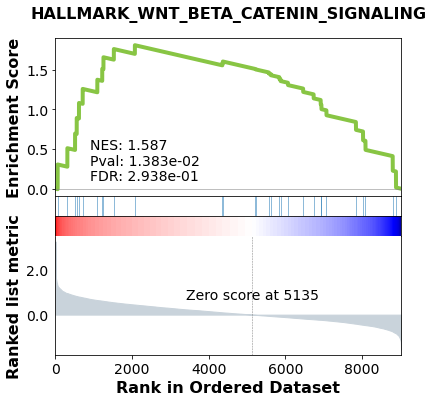

In [23]:
from gseapy import gseaplot, heatmap
terms = gs_res.res2d.Term
i = 2
# Make sure that ``ofname`` is not None, if you want to save your figure to disk
gseaplot(gs_res.ranking, term=terms[i], **gs_res.results[terms[i]])

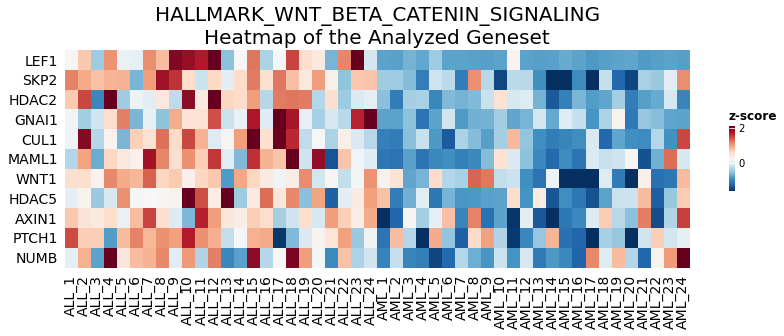

In [24]:
# plotting heatmap
genes = gs_res.res2d.Lead_genes[i].split(";")
# Make sure that ``ofname`` is not None, if you want to save your figure to disk
heatmap(df = gs_res.heatmat.loc[genes], z_score=0, title=terms[i], figsize=(14,4), cmap=plt.cm.RdBu_r)

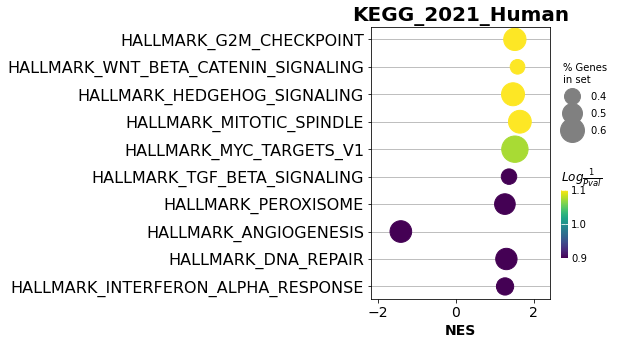

In [25]:
from gseapy import dotplot, ringplot
# to save your figure, make sure that ``ofname`` is not None
ax = dotplot(gs_res.res2d, 
             column="FDR q-val",
             title='KEGG_2021_Human',
             cmap=plt.cm.viridis, 
             size=15, 
             figsize=(4,5), cutoff=1)

In [28]:
from urllib import request
url = "https://refinebio-examples.s3.us-east-2.amazonaws.com/03-rnaseq/results/SRP123625/SRP123625_differential_expression_results.tsv"
savename = "./tests/extdata/SRP123625_differential_expression_results.tsv" 
mem = request.urlopen(url).read()
with open(savename, mode="wb") as f:
    f.write(mem)
    print("저장되었습니다.")

저장되었습니다.


In [33]:
data = pd.read_csv(savename, sep='\t')
data

,Gene,baseMean,log2FoldChange,lfcSE,pvalue,padj,threshold
0,ENSMUSG00000026623,410.224553,13.349409,3.178568,3.136545e-23,9.846024e-21,True
1,ENSMUSG00000053522,264.281334,12.641963,3.109426,3.637922e-21,8.755266e-19,True
2,ENSMUSG00000047361,244.281427,12.518239,3.093261,4.912369e-21,1.144107e-18,True
3,ENSMUSG00000037325,3450.357690,12.192777,0.726410,1.238587e-60,1.788520e-57,True
4,ENSMUSG00000106334,189.219302,12.100253,3.059503,1.840175e-19,3.742553e-17,True
...,...,...,...,...,...,...,...
19882,ENSMUSG00000056054,38.722878,-9.462881,3.037148,3.264880e-09,1.932167e-07,True
19883,ENSMUSG00000029915,51.397725,-10.005142,3.043618,6.711294e-11,5.475203e-09,True
19884,ENSMUSG00000039109,8650.470058,-10.582727,0.339246,2.054445e-213,1.483309e-209,True
19885,ENSMUSG00000001020,1697.451241,-10.810637,1.113359,2.601820e-23,8.348952e-21,True


In [ ]:
# run gsea
# enrichr libraries are supported by gsea module. Just provide the name
gs_res = gp.gsea(data=gene_exp, # or data='./P53_resampling_data.txt'
                 gene_sets='./tests/extdata/h.all.v7.0.symbols.gmt', # or enrichr library names
                 cls= "./tests/extdata/Leukemia.cls", # cls=class_vector
                 # set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype', 
                 permutation_num=1000, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 method='signal_to_noise',
                 threads=4, seed= 7)